### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# **Problems**

#### Use the prompts below to get started with your data analysis.  

# 1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# 2. Investigate the dataset for missing or problematic data.

#### Columns 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' have missing data. 
#### Column 'toCoupon_GEQ5min' have only one value = 1 (True) for all entries

In [10]:
#Display statistics for each category
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [11]:
#Summarize number of null entries for each category
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [12]:
#Print a list of column names
column_titles = data.columns.tolist()
print(column_titles)

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


#### Following section includes inspection of each category for content characteristics, I am looking whether entries are continous or categorical, what is distribution of answers for each category, and if there are any unexpected entries what do they look like.

In [14]:
#Print count of values for category 'destination'
data['destination'].value_counts()

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

In [15]:
#Print count of values for category 'passanger'
data['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [16]:
#Print count of values for category 'weather'
data['weather'].value_counts()

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

In [17]:
#Print count of values for category 'temperature'
data['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [18]:
#Print count of values for category 'time'
data['time'].value_counts()

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

In [19]:
#Print count of values for category 'coupon'
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [20]:
#Print count of values for category 'expiration'
data['expiration'].value_counts()

expiration
1d    7091
2h    5593
Name: count, dtype: int64

In [21]:
#Print count of values for category 'gender'
data['gender'].value_counts()

gender
Female    6511
Male      6173
Name: count, dtype: int64

In [22]:
#Print count of values for category 'age'
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [23]:
#Print count of values for category 'maritalStatus'
data['maritalStatus'].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [24]:
#Print count of values for category 'has_children'
data['has_children'].value_counts()

has_children
0    7431
1    5253
Name: count, dtype: int64

In [25]:
#Print count of values for category 'education'
data['education'].value_counts()

education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64

In [26]:
#Print count of values for category 'occupation'
data['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [27]:
#Print count of values for category 'income'
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [28]:
#Print count of values for category 'car'
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [29]:
#Print count of values for category 'Bar'
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [30]:
#Print count of values for category 'CoffeeHouse'
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [31]:
#Print count of values for category 'CarryAway'
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [32]:
#Print count of values for category 'RestaurantLessThan20'
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [33]:
#Print count of values for category 'Restaurant20To50'
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [34]:
#Print count of values for category 'toCoupon_GEQ5min'
data['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [35]:
#Print count of values for category 'toCoupon_GEQ15min'
data['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [36]:
#Print count of values for category 'toCoupon_GEQ25min'
data['toCoupon_GEQ25min'].value_counts()

toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64

In [37]:
#Print count of values for category 'direction_same'
data['direction_same'].value_counts()

direction_same
0    9960
1    2724
Name: count, dtype: int64

In [38]:
#Print count of values for category 'direction_opp'
data['direction_opp'].value_counts()

direction_opp
1    9960
0    2724
Name: count, dtype: int64

In [39]:
#Print count of values for category 'Y'
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

# 3. Decide what to do about your missing data -- drop, replace, other...

#### After inspection of the data, I have decided to drop rows that are incomplete for 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'. My rationale is that there is no easy way to replace missing values and each category is missing only ~1% of data. The remaining data should still faithfully represent the original dataset. 
#### I have decided to not analyze category 'car' since it is missing 99% of entires, I have removed that column.


In [42]:
#Drop entries missing values for 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' from dataset
data_c = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
#Drop column 'car' from dataset
data_c = data_c.drop(columns=['car'])
#Display statistics for each category for cleaned dataset named data_c
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [43]:
#Print how many rows of data were lost during the cleaning
print("Number of entries lost =",len(data)-len(data_c),", out of total = ",len(data))

Number of entries lost = 605 , out of total =  12684


# 4. What proportion of the total observations chose to accept the coupon? 



#### 57% of all observed customers accepted the coupon
#### I had computed the % of observations accepting coupon before and after cleaning the dataset to see if removing data biased it in a substantial way. Before cleaning there were 56.84% and after cleaning 56.93% that accepted coupon. Small difference between these two values is likely caused by a sampling noise. 

In [46]:
#Calculate % of observations where the coupon was accepted for dataset before cleaning
accepted_coupon = len(data[data['Y']== 1]) / len(data['Y'])
print(round(accepted_coupon*100, 2),"% of total observations accepted the coupon in the dataset before cleaning")

56.84 % of total observations accepted the coupon in the dataset before cleaning


In [47]:
#Calculate % of observations where the coupon was accepted for dataset after cleaning
accepted_coupon_c = len(data_c[data_c['Y']== 1]) / len(data_c['Y'])
print(round(accepted_coupon_c*100, 2),"% of total observations accepted the coupon in the cleaned dataset")

56.93 % of total observations accepted the coupon in the cleaned dataset


# 5. Use a bar plot to visualize the `coupon` column.

#### I have displayed the barplot and countplot. Barplot in this data formatting just displays one column which while infomrative I would argue defeats a purpose of making graphs. For that reasone I have also caluclated countplot of data.

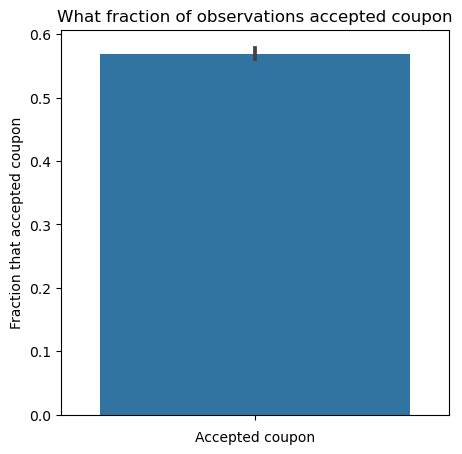

In [50]:
# I have visualized fraction of obserations that accepted coupon using seborn's barplot
plt.figure(figsize=(5, 5))
sns.barplot(data=data_c, y='Y')
plt.xlabel("Accepted coupon")
plt.ylabel("Fraction that accepted coupon")
plt.title("What fraction of observations accepted coupon")
plt.show()
plt.close()

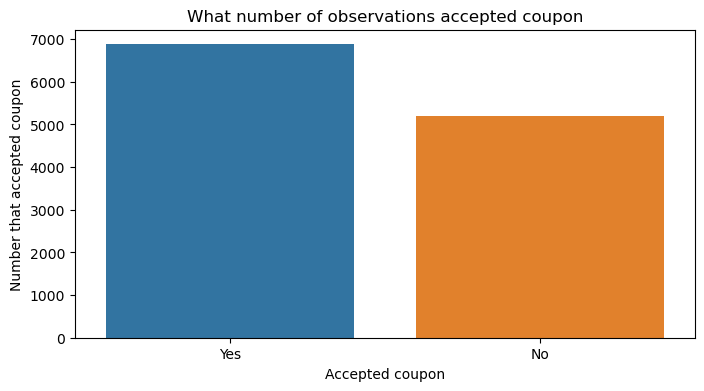

In [51]:
# I have visualized numner of obserations that accepted coupon using seborn's countplot. 
# For ease of reading I have converted numerical entries into Yes/No.
plt.figure(figsize=(8, 4))
sns.countplot(data=data_c[['Y']].replace({1: 'Yes', 0: 'No'}), x='Y')
plt.xlabel("Accepted coupon")
plt.ylabel("Number that accepted coupon")
plt.title("What number of observations accepted coupon")
plt.show()
plt.close()

# 6. Use a histogram to visualize the temperature column.

#### Histogram of remperatures displays only 3 values because data already appears to be aggregated into just 3 temperture ranges. 

C:\Users\grzyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


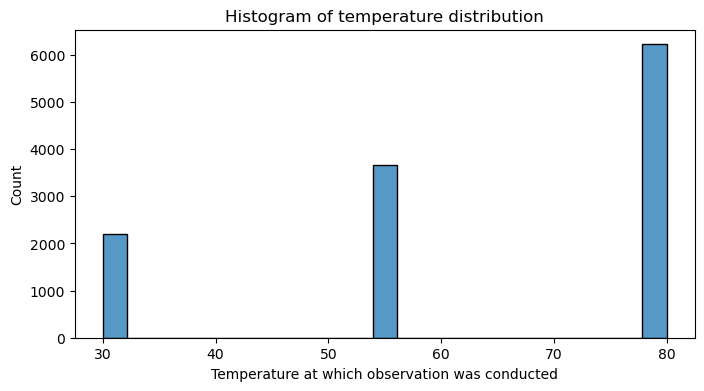

In [54]:
# I have visualized the temperature distribution using Seborn's histplot 
plt.figure(figsize=(8, 4))
sns.histplot(data=data_c, x='temperature')
plt.title("Histogram of temperature distribution")
plt.xlabel("Temperature at which observation was conducted")
plt.show()
plt.close()

# **Investigating the Bar Coupons**

#### Now, we will lead you through an exploration of just the bar related coupons.  

# 1. Create a new `DataFrame` that contains just the bar coupons.


#### I have created new `DataFrame` called data_bar containing just bar coupons

In [57]:
#Subset the cleaned dataset to just contain bar coupons information
data_bar = data_c[data_c['coupon']=='Bar']
#Diplay key characteristics of the new dataset
data_bar.info()
#Test whether data is a DataFrame
print("\n",type(data_bar))

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

# 2. What proportion of bar coupons were accepted?


#### 41% of observations have accepted the bar coupon

In [60]:
#Calculate % of observations where the bar coupon was accepted
accepted_bar_coupon = data_bar['Y'].sum() / data_bar['Y'].count()
print(round(accepted_bar_coupon*100, 2),"% of total observations accepted the bar coupon")

41.19 % of total observations accepted the bar coupon


# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


#### Acceptance rate for customers that went to a bar 3 or fewer times a month was 37% as compared to those who went more than 3 times a month that was equal 76%. 
#### Going more often to bar correlated with greater chance of accepting the bar coupon.

In [63]:
# Set of 'Bar' values smaller or equal than 3
lessbar3 = ['never','less1', '1~3']

# Calculate % of observations that went to a bar less or equal than 3 times a month accepted the bar coupon
accepted_bar_coupon_lessbar = data_bar.query('Bar in @lessbar3')['Y'].sum() / data_bar.query('Bar in @lessbar3')['Y'].count()
# Print the results for accepted_bar_coupon_lessbar, convert fraction to percentage
print(round(accepted_bar_coupon_lessbar*100, 2),"% of observations that went to a bar less or equal than 3 times a month accepted the bar coupon")

# Calculate % of observations that went to a bar more than 3 times a month accepted the bar coupon
accepted_bar_coupon_morebar = data_bar.query('Bar not in @lessbar3')['Y'].sum() / data_bar.query('Bar not in @lessbar3')['Y'].count()
# Print the results for accepted_bar_coupon_morebar, convert fraction to percentage
print(round(accepted_bar_coupon_morebar*100, 2),"% of observations that went to a bar more than 3 times a month accepted the bar coupon")


37.27 % of observations that went to a bar less or equal than 3 times a month accepted the bar coupon
76.17 % of observations that went to a bar more than 3 times a month accepted the bar coupon


# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


#### Acceptance rate for customers that went to a bar more than once a month and are over the age of 25 was 69% as compared to those who went to a bar less than once a month or are under the age of 25 was equal to 34%. 
#### Going more often than once a month correlated with greater chance of accepting coupon.

In [66]:
# Set of 'Bar' values greater or equal 1
morebar1 = ['4~8','gt8', '1~3']
# Set of 'age' values greater than 25
moreage25 = ['26','31','36','41','46','50plus']

# Calculate % of observations that went to a bar more than once a month and are over the age of 25 that accepted the bar coupon
accepted_bar_coupon_morebar_moreage = (
    data_bar[(data_bar['Bar'].isin(morebar1)) & (data_bar['age'].isin(moreage25))]['Y'].sum() / 
    data_bar[(data_bar['Bar'].isin(morebar1)) & (data_bar['age'].isin(moreage25))]['Y'].count()
)
# Print the results for accepted_bar_coupon_morebar_moreage, convert fraction to percentage
print(
    round(accepted_bar_coupon_morebar_moreage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars more than once a month and are over age of 25")


# Calculate % of observations that went to a bar more than once a month and are under the age of 25 that accepted the bar coupon
accepted_bar_coupon_morebar_lessage = (
    data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['age'].isin(moreage25))]['Y'].sum() / 
    data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['age'].isin(moreage25))]['Y'].count()
)
# Print the results for accepted_bar_coupon_morebar_lessage, convert fraction to percentage
print(
    round(accepted_bar_coupon_morebar_lessage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars more than once a month and are under age of 25")


# Calculate % of observations that went to a bar less than once a month and are under the age of 25 that accepted the bar coupon
accepted_bar_coupon_lessbar_lessage = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) & ~(data_bar['age'].isin(moreage25))]['Y'].sum() / 
    data_bar[~(data_bar['Bar'].isin(morebar1)) & ~(data_bar['age'].isin(moreage25))]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessbar_lessage, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessbar_lessage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars less than once a month and are under age of 25")



# Calculate % of observations that went to a bar less than once a month and are over the age of 25 that accepted the bar coupon
accepted_bar_coupon_lessbar_moreage = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) & (data_bar['age'].isin(moreage25))]['Y'].sum() / 
    data_bar[~(data_bar['Bar'].isin(morebar1)) & (data_bar['age'].isin(moreage25))]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessbar_moreage, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessbar_moreage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars less than once a month and are over age of 25")



# Calculate % of observations that went to a bar less than once a month or are under the age of 25 that accepted the bar coupon
accepted_bar_coupon_lessbar_or_lessage = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) | ~(data_bar['age'].isin(moreage25))]['Y'].sum() / 
    data_bar[~(data_bar['Bar'].isin(morebar1)) | ~(data_bar['age'].isin(moreage25))]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessbar_or_lessage, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessbar_or_lessage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars less than once a month or are under age of 25")


68.98 % of bar coupon acceptance for drivers that go to bars more than once a month and are over age of 25
67.46 % of bar coupon acceptance for drivers that go to bars more than once a month and are under age of 25
38.83 % of bar coupon acceptance for drivers that go to bars less than once a month and are under age of 25
26.74 % of bar coupon acceptance for drivers that go to bars less than once a month and are over age of 25
33.77 % of bar coupon acceptance for drivers that go to bars less than once a month or are under age of 25


# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


#### Not working in Farming Fishing & Forestry and going to bar **more** than once a month and having a passangers that were kid(s) vs not kid(s) - 38.10 % vs 70.94 %
#### Not working in Farming Fishing & Forestry and going to bar **less** than once a month and having a passangers that were kid(s) vs not kid(s) - 15.44 % vs 31.19 %
#### Driving kids is negatively correlated with accepting the bar coupon
#### Whether working for farming, fishing, or forestry has any effect on accepting bar coupons is obscured by insufficient data - there is only 9 drivers that were issued bar coupons that worked in farming, fishing, or forestry.

In [69]:
# Set of 'Bar' values greater or equal 1
morebar1 = ['4~8','gt8', '1~3']

# Calculate  %  of drivers that accepted coupon and went more than once a month to a bar and had passengers that were not a kid and
# had occupations other than farming, fishing, or forestry
accepted_bar_coupon_morebar_lesskids_morejob = (
    data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['passanger']=='Kid(s)') & ~(data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].sum() /
    data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['passanger']=='Kid(s)') & ~(data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].count()
)
# Print the results for accepted_bar_coupon_morebar_lesskids_morejob
print("\n",
    round(accepted_bar_coupon_morebar_lesskids_morejob*100, 2),
    "% of bar coupon acceptance for drivers that go more than once a month to a bar and had passengers that were not a kid and \n had occupations other than farming, fishing, or forestry")


# Calculate  %  of drivers that accepted coupon and went more than once a month to a bar and had passengers that were a kid and
# had occupations other than farming, fishing, or forestry
accepted_bar_coupon_morebar_morekids_morejob = (
    data_bar[(data_bar['Bar'].isin(morebar1)) & (data_bar['passanger']=='Kid(s)') & ~(data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].sum() /
    data_bar[(data_bar['Bar'].isin(morebar1)) & (data_bar['passanger']=='Kid(s)') & ~(data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].count()
)
# Print the results for accepted_bar_coupon_morebar_morekids_morejob
print("\n",
    round(accepted_bar_coupon_morebar_morekids_morejob*100, 2),
    "% of bar coupon acceptance for drivers that go more than once a month to a bar and had passengers that were a kid and \n had occupations other than farming, fishing, or forestry")


# Calculate  %  of drivers that accepted coupon and went less than once a month to a bar and had passengers that were not a kid and
# had occupations other than farming, fishing, or forestry
accepted_bar_coupon_lessbar_lesskids_morejob = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) & ~(data_bar['passanger']=='Kid(s)') & ~(data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].sum() /
    data_bar[~(data_bar['Bar'].isin(morebar1)) & ~(data_bar['passanger']=='Kid(s)') & ~(data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessbar_lesskids_morejob
print("\n",
    round(accepted_bar_coupon_lessbar_lesskids_morejob*100, 2),
    "% of bar coupon acceptance for drivers that go less than once a month to a bar and had passengers that were not a kid and \n had occupations other than farming, fishing, or forestry")


# Calculate  %  of drivers that accepted coupon and went less than once a month to a bar and had passengers that were a kid and
# had occupations other than farming, fishing, or forestry
accepted_bar_coupon_lessbar_morekids_morejob = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) & (data_bar['passanger']=='Kid(s)') & ~(data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].sum() /
    data_bar[~(data_bar['Bar'].isin(morebar1)) & (data_bar['passanger']=='Kid(s)') & ~(data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessbar_morekids_morejob
print("\n",
    round(accepted_bar_coupon_lessbar_morekids_morejob*100, 2),
    "% of bar coupon acceptance for drivers that go less than once a month to a bar and had passengers that were a kid and \n had occupations other than farming, fishing, or forestry")



# Calculate  %  of drivers that accepted coupon and went less than once a month to a bar or had passengers that were a kid or 
# had occupations as farming, fishing, or forestry
accepted_bar_coupon_lessbar_or_morekids_or_lessjob = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) | (data_bar['passanger']=='Kid(s)') | (data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].sum() /
    data_bar[~(data_bar['Bar'].isin(morebar1)) | (data_bar['passanger']=='Kid(s)') | (data_bar['occupation']=='Farming Fishing & Forestry')]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessbar_or_morekids_or_lessjob, convert fraction to percentage
print("\n",
    round(accepted_bar_coupon_lessbar_or_morekids_or_lessjob*100, 2),
    "% of bar coupon acceptance for drivers that go less than once a month to a bar or had passengers that were a kid or \n had occupations as farming, fishing, or forestry")



# Print number of drivers that were issued bar coupons that work in Farming Fishing & Forestry
print("\n",
      len(data_bar[data_bar['occupation']=='Farming Fishing & Forestry']),
      " - Number of drivers that were issued bar coupons that work in Farming Fishing & Forestry")



 70.94 % of bar coupon acceptance for drivers that go more than once a month to a bar and had passengers that were not a kid and 
 had occupations other than farming, fishing, or forestry

 38.1 % of bar coupon acceptance for drivers that go more than once a month to a bar and had passengers that were a kid and 
 had occupations other than farming, fishing, or forestry

 31.19 % of bar coupon acceptance for drivers that go less than once a month to a bar and had passengers that were not a kid and 
 had occupations other than farming, fishing, or forestry

 15.44 % of bar coupon acceptance for drivers that go less than once a month to a bar and had passengers that were a kid and 
 had occupations other than farming, fishing, or forestry

 29.79 % of bar coupon acceptance for drivers that go less than once a month to a bar or had passengers that were a kid or 
 had occupations as farming, fishing, or forestry

 9  - Number of drivers that were issued bar coupons that work in Farming Fis

# 6. Compare the acceptance rates between those drivers who:

#### - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
#### - go to bars more than once a month and are under the age of 30 *OR*
#### - go to cheap restaurants more than 4 times a month and income is less than 50K. 



## Go to bars more than once a month, had passengers that were not a kid, and were not widowed

#### 71% bar coupon acceptance for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed. This is same acceptance as for drivers that go to bars more than once a month, had passengers that were not a kid, becasue among drivers that go to bars more than once a month, and had passengers that were not a kid, there are no widowed drivers.
#### Being widowed or not is not a suitable predictor for acceptance of bar coupons due to insufficient data.

In [73]:
#Set of 'bar' with more than one visit a month
morebar1 = ['4~8','gt8', '1~3']
#Set of 'age' less than 30
lessage30 = ['below21','21','26']
#Set of 'RestaurantLessThan20' with more than 4 visits a month
moredirtrest4 = ['4~8','gt8']
#Set of 'income' less than $50000
lessincome50 = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

# Calculate % of bar coupon acceptance for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed
accepted_bar_coupon_morebar_lesskids_lesswidowed = (
    data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['passanger']=='Kid(s)') & ~(data_bar['maritalStatus']=='Widowed')]['Y'].sum() /
    data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['passanger']=='Kid(s)') & ~(data_bar['maritalStatus']=='Widowed')]['Y'].count()
)

# Print the results for accepted_bar_coupon_morebar_lesskids_lesswidowed, convert fraction to percentage
print(
    round(accepted_bar_coupon_morebar_lesskids_lesswidowed*100, 2),
    "% of bar coupon acceptance for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed")


# Calculate % of bar coupon acceptance for drivers that go to bars less than once a month or had passengers that were a kid, or are widowed
accepted_bar_coupon_lessbar_morekids_morewidowed = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) | (data_bar['passanger']=='Kid(s)') | (data_bar['maritalStatus']=='Widowed')]['Y'].sum() /
    data_bar[~(data_bar['Bar'].isin(morebar1)) | (data_bar['passanger']=='Kid(s)') | (data_bar['maritalStatus']=='Widowed')]['Y'].count()
)

# Print the results for accepted_bar_coupon_lessbar_morekids_morewidowed, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessbar_morekids_morewidowed*100, 2),
    "% of bar coupon acceptance for drivers that go to bars less than once a month or had passengers that were a kid, or are widowed")


#Print number of drivers that go to bars more than once a month, and had passengers that were not a kid, and are widowed.
print("\n",len(data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['passanger']=='Kid(s)') &  (data_bar['maritalStatus']=='Widowed')]),
      " - number of drivers that go to bars more than once a month, and had passengers that were not a kid, and are widowed.")



70.94 % of bar coupon acceptance for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed
29.79 % of bar coupon acceptance for drivers that go to bars less than once a month or had passengers that were a kid, or are widowed

 0  - number of drivers that go to bars more than once a month, and had passengers that were not a kid, and are widowed.


## Go to bars more than once a month and are under the age of 30

#### Going to bar more often and being under 30 vs over 30 - 71.95 % vs 63.93 % 
#### Going to bar more often and being under 25 vs over 25 - 67.46 % vs 68.98 %
#### Going to bar less often and being under 30 vs over 30 - 34.17 % vs 26.61 % 
#### Going to bar less often and being under 25 vs over 25 - 38.83 % vs 26.74 %
#### Age perhaps has some weak or complex correlation with coupon acceptance, it seems that age might be negatively correlated with acceptance of bar coupon, independent of how often driver goes to a bar in a month, however for group under 25 among drivers that attend more than 1 time per month the correlation seems lost. 

In [76]:
# Calculate % of bar coupon acceptance for drivers that go to bars more than once a month and are under the age of 30
accepted_bar_coupon_morebar_lessage = (
    data_bar[(data_bar['Bar'].isin(morebar1)) & (data_bar['age'].isin(lessage30))]['Y'].sum() / 
    data_bar[(data_bar['Bar'].isin(morebar1)) & (data_bar['age'].isin(lessage30))]['Y'].count()
)
# Print the results for accepted_bar_coupon_morebar_moreage, convert fraction to percentage
print(
    round(accepted_bar_coupon_morebar_lessage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars more than once a month and are under the age of 30")



# Calculate % of bar coupon acceptance for drivers that go to bars more than once a month and are over the age of 30
accepted_bar_coupon_morebar_moreage = (
    data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['age'].isin(lessage30))]['Y'].sum() / 
    data_bar[(data_bar['Bar'].isin(morebar1)) & ~(data_bar['age'].isin(lessage30))]['Y'].count()
)
# Print the results for accepted_bar_coupon_morebar_moreage, convert fraction to percentage
print(
    round(accepted_bar_coupon_morebar_moreage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars more than once a month and are over the age of 30")



# Calculate % of bar coupon acceptance for drivers that go to bars less than once a month and are under the age of 30
accepted_bar_coupon_lessbar_lessage = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) & (data_bar['age'].isin(lessage30))]['Y'].sum() / 
    data_bar[~(data_bar['Bar'].isin(morebar1)) & (data_bar['age'].isin(lessage30))]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessbar_lessage, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessbar_lessage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars less than once a month and are under the age of 30")



# Calculate % of bar coupon acceptance for drivers that go to bars less than once a month and are over the age of 30
accepted_bar_coupon_lessbar_moreage = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) & ~(data_bar['age'].isin(lessage30))]['Y'].sum() / 
    data_bar[~(data_bar['Bar'].isin(morebar1)) & ~(data_bar['age'].isin(lessage30))]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessbar_moreage, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessbar_moreage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars less than once a month and are over the age of 30")



# Calculate % of bar coupon acceptance for drivers that go to bars less than once a month or are over the age of 30
accepted_bar_coupon_lessbar_or_moreage = (
    data_bar[~(data_bar['Bar'].isin(morebar1)) | ~(data_bar['age'].isin(lessage30))]['Y'].sum() / 
    data_bar[~(data_bar['Bar'].isin(morebar1)) | ~(data_bar['age'].isin(lessage30))]['Y'].count()
)
# Print the results for accepted_bar_coupon_morebar_moreage, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessbar_or_moreage*100, 2),
    "% of bar coupon acceptance for drivers that go to bars less than once a month or are over the age of 30")

71.95 % of bar coupon acceptance for drivers that go to bars more than once a month and are under the age of 30
63.93 % of bar coupon acceptance for drivers that go to bars more than once a month and are over the age of 30
34.17 % of bar coupon acceptance for drivers that go to bars less than once a month and are under the age of 30
26.61 % of bar coupon acceptance for drivers that go to bars less than once a month and are over the age of 30
34.83 % of bar coupon acceptance for drivers that go to bars less than once a month or are over the age of 30


## Go to cheap restaurants more than 4 times a month and income is less than 50K

#### Making less than 50k and going to cheap restaurant more than 4 times a mont vs less than 4 times - 45.65 % vs 40.53 %
#### Making more than 50k and going to cheap restaurant more than 4 times a mont vs less than 4 times - 40.65 % vs 39.63 %
#### Lower income for drivers that go more than 4 times a month to a cheap restaurant positively correlate with the bar coupon acceptance

In [79]:
# Calculate % of bar coupon acceptance for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K
accepted_bar_coupon_moredirtrest_lessincome = (
    data_bar[(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) & (data_bar['income'].isin(lessincome50))]['Y'].sum() / 
    data_bar[(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) & (data_bar['income'].isin(lessincome50))]['Y'].count()
)
# Print the results for accepted_bar_coupon_moredirtrest_lessincome, convert fraction to percentage
print(
    round(accepted_bar_coupon_moredirtrest_lessincome*100, 2),
    "% of bar coupon acceptance for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K")



# Calculate % of bar coupon acceptance for drivers that go to cheap restaurants more than 4 times a month and income is more than 50K
accepted_bar_coupon_moredirtrest_moreincome = (
    data_bar[(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) & ~(data_bar['income'].isin(lessincome50))]['Y'].sum() / 
    data_bar[(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) & ~(data_bar['income'].isin(lessincome50))]['Y'].count()
)
# Print the results for accepted_bar_coupon_moredirtrest_moreincome, convert fraction to percentage
print(
    round(accepted_bar_coupon_moredirtrest_moreincome*100, 2),
    "% of bar coupon acceptance for drivers that go to cheap restaurants more than 4 times a month and income is more than 50K")



# Calculate % of bar coupon acceptance for drivers that go to cheap restaurants less than 4 times a month and income is less than 50K
accepted_bar_coupon_lessdirtrest_lessincome = (
    data_bar[~(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) & (data_bar['income'].isin(lessincome50))]['Y'].sum() / 
    data_bar[~(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) & (data_bar['income'].isin(lessincome50))]['Y'].count()
)
# Print the results for accepted_bar_coupon_lessdirtrest_lessincome, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessdirtrest_lessincome*100, 2),
    "% of bar coupon acceptance for drivers that go to cheap restaurants less than 4 times a month and income is less than 50K")



# Calculate % of bar coupon acceptance for drivers that go to cheap restaurants less then 4 times a month and income is more than 50K
accepted_bar_coupon_lessdirtrest_moreincome = (
    data_bar[~(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) & ~(data_bar['income'].isin(lessincome50))]['Y'].sum() / 
    data_bar[~(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) & ~(data_bar['income'].isin(lessincome50))]['Y'].count()
)
# Print the results for accepted_bar_coupon_moredirtrest_lessincome, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessdirtrest_moreincome*100, 2),
    "% of bar coupon acceptance for drivers that go to cheap restaurants less than 4 times a month and income is more than 50K")



# Calculate % of bar coupon acceptance for drivers that go to cheap restaurants less then 4 times a month or income is more than 50K
accepted_bar_coupon_lessdirtrest_or_moreincome = (
    data_bar[~(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) | ~(data_bar['income'].isin(lessincome50))]['Y'].sum() / 
    data_bar[~(data_bar['RestaurantLessThan20'].isin(moredirtrest4)) | ~(data_bar['income'].isin(lessincome50))]['Y'].count()
)
# Print the results for accepted_bar_coupon_moredirtrest_lessincome, convert fraction to percentage
print(
    round(accepted_bar_coupon_lessdirtrest_or_moreincome*100, 2),
    "% of bar coupon acceptance for drivers that go to cheap restaurants less than 4 times a month or income is more than 50K")


45.65 % of bar coupon acceptance for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K
40.65 % of bar coupon acceptance for drivers that go to cheap restaurants more than 4 times a month and income is more than 50K
40.53 % of bar coupon acceptance for drivers that go to cheap restaurants less than 4 times a month and income is less than 50K
39.63 % of bar coupon acceptance for drivers that go to cheap restaurants less than 4 times a month and income is more than 50K
40.25 % of bar coupon acceptance for drivers that go to cheap restaurants less than 4 times a month or income is more than 50K


# 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Findings:
#### 1. Going to a bar more than one time a month is strongly correlated with a bar coupon acceptance
#### 2. Not driving with kid(s) is positively correlated with a bar coupon acceptance
#### 3. Being under 30 years old is positively correlated with a bar coupon acceptance
#### 4. Lower income for drivers that go more than 4 times a month to a cheap restaurant positively correlated with a bar coupon acceptance
#### 5. Whether working for farming, fishing, or forestry has any effect on accepting bar coupons is obscured by insufficient data
#### 6. Whether being widowed has any effect on accepting bar coupons is obscured by insufficient data
# Next steps and recommendations:
#### 1. It is possible that going out to eat/drink more often might be correlated with a bar coupon acceptance, I recommend testing for correlations with drivers that go to coffee shops more often as well as more expensive restaurants category. 
#### 2. It is possible that individuals that make less money as well as some low income occupations might be correlated with coupon acceptance, I recommend testing for correlation among those groups.

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## I have created new `DataFrame` called data_coffee containing just Coffee House coupons

In [84]:
#Subset the cleaned dataset to just contain bar coupons information
data_coffee = data_c[data_c['coupon']=='Coffee House']
#Diplay key characteristics of the new dataset
data_coffee.info()
#Test whether data is a DataFrame
print("\n",type(data_coffee))

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null   obj

## I have calculated what percentage of Coffee House coupons were accepted
#### 49.63% of drivers accepted Coffee House coupon

In [86]:
#Calculate % of observations where the Coffee House coupon was accepted
accepted_coffee_coupon = data_coffee['Y'].sum() / data_coffee['Y'].count()
print(round(accepted_coffee_coupon*100, 2),"% of total observations accepted the Coffee House coupon")

49.63 % of total observations accepted the Coffee House coupon


## I have performed univariate exploration of potential correlations between catagories in data_coffee and acceptance of Coffee House coupons

In [88]:
#Print a list of column names
column_titles = data_coffee.columns.tolist()
print(column_titles)

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


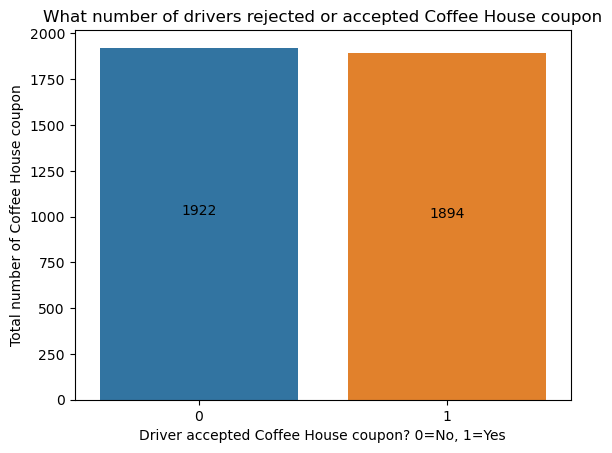

In [89]:
#Count of 
barplot=sns.countplot(data=data_coffee, x="Y")
plt.xlabel("Driver accepted Coffee House coupon? 0=No, 1=Yes")
plt.ylabel("Total number of Coffee House coupon")
plt.title("What number of drivers rejected or accepted Coffee House coupon")
#Annotate each bar with count of rejected or accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

## How does the destination affects acceptance of Coffee House coupon?

#### Observations:
#### Drivers are more likely to accept Coffee House coupon when they are not going Home (36.3%) or Work (44%) vs No urgent place (57.8%)

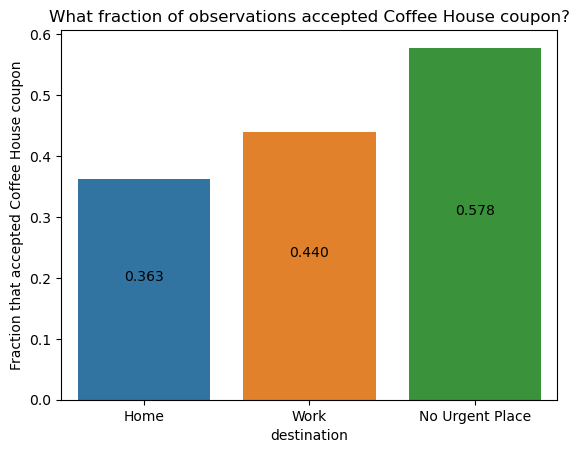

In [92]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'destination'
barplot=sns.barplot(data=data_coffee.groupby('destination')[['Y']].mean().reset_index().sort_values(by='Y'), x='destination', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [93]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'destination'
data_coffee.groupby('destination')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

destination     Y                
                     sum count      mean
0             Home   322   888  0.362613
1  No Urgent Place  1187  2053  0.578178
2             Work   385   875  0.440000

## How does the type of the passanger affects Coffee House coupon acceptance?

#### Observations:
#### Driving with a Friend(s) (59.7%) or a Partner (56.7%) increased Coffee House coupon acceptance vs driving with Kid(s) (47.2%) or alone (43.4%) which decreased likelyhood of accepting the coupon

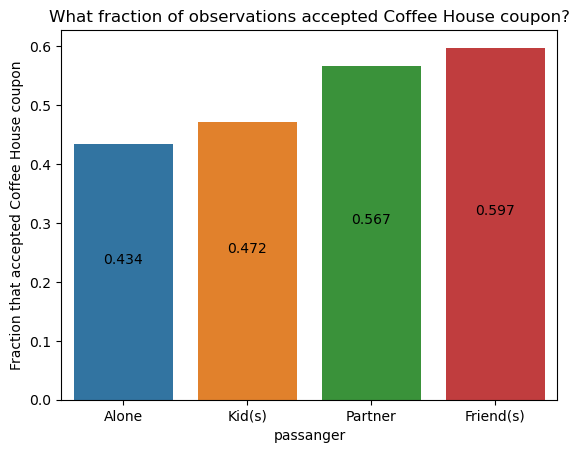

In [96]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'passanger'
barplot=sns.barplot(data=data_coffee.groupby('passanger')[['Y']].mean().reset_index().sort_values(by='Y'), x='passanger', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [97]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'passanger'
data_coffee.groupby('passanger')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

passanger    Y                
              sum count      mean
0      Alone  936  2157  0.433936
1  Friend(s)  702  1175  0.597447
2     Kid(s)   91   193  0.471503
3    Partner  165   291  0.567010

## How does weather affects likelyhood of accepting Coffee House coupon?

#### Obervations:
#### Snowy weather (42.8%, N=285) discouraged drivers from accepting Coffee House coupon, while Sunny (50.1%, N=3316) or Rainy (51.6%, N=215) is likely neutral for accepting the coupon 

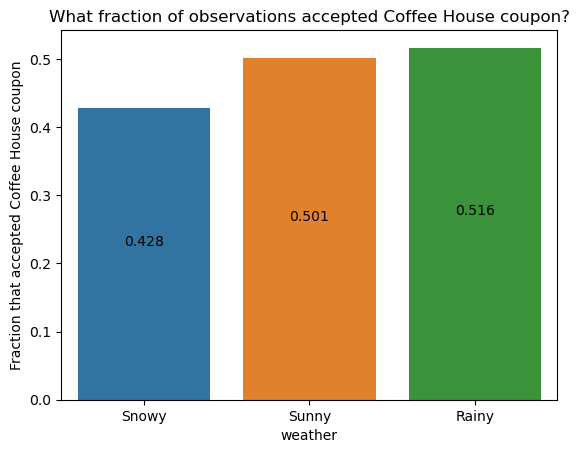

In [100]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'weather'
barplot=sns.barplot(data=data_coffee.groupby('weather')[['Y']].mean().reset_index().sort_values(by='Y'), x='weather', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [101]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'weather'
data_coffee.groupby('weather')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

weather     Y                
            sum count      mean
0   Rainy   111   215  0.516279
1   Snowy   122   285  0.428070
2   Sunny  1661  3316  0.500905

## How does air temperature affects likelyhood of accepting Coffee House coupon?

#### Observations:
#### Warmer air temperature (80F : 52.7%, N=2298) weakly correlates with acceptance of Coffee House coupon while cooler temperatures (30F : 44.1% N=299; 50F : 45.2%, N=1219) are negatively correlated with acceptance of the coupon. 

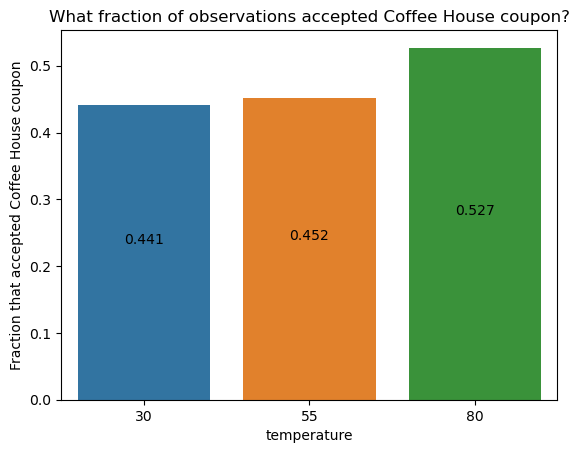

In [104]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'temperature'
barplot=sns.barplot(data=data_coffee.groupby('temperature')[['Y']].mean().reset_index(), x='temperature', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [105]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'temperature'
data_coffee.groupby('temperature')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

temperature     Y                
                sum count      mean
0          30   132   299  0.441472
1          55   551  1219  0.452010
2          80  1211  2298  0.526980

## How does time of day affects acceptance of the Coffee House coupon?

#### Observations:
#### Late morning (10AM : 63.5%) and early afternoon (2PM : 54.5%) positively correlated with acceptance of the Coffee House coupon, while late afternoon (6PM : 41.2%), night (42.9%) and early morning (44.0%) are negatively correlated with acceptance of the coupon.

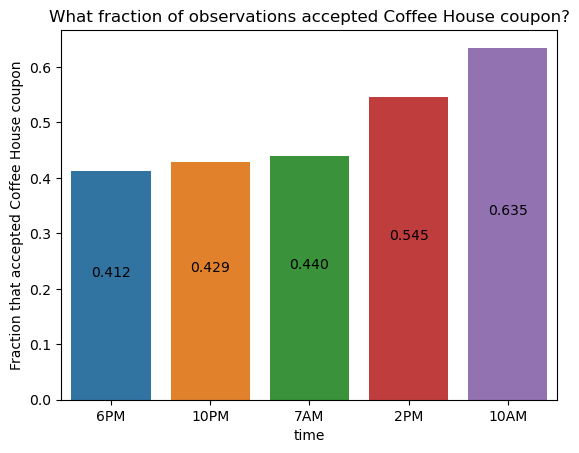

In [108]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'time'
barplot=sns.barplot(data=data_coffee.groupby('time')[['Y']].mean().reset_index().sort_values(by='Y'), x='time', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [109]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'time'
data_coffee.groupby('time')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

time    Y                
         sum count      mean
0  10AM  544   857  0.634772
1  10PM  121   282  0.429078
2   2PM  414   759  0.545455
3   6PM  430  1043  0.412272
4   7AM  385   875  0.440000

## How does time to coupon expiration affects likelyhood of accepting the Coffee House coupon?

#### Observations:
#### Drivers prefer longer expiration (1 day : 58.1%) over short expiration (2hr : 42.9%) for accepting Coffee House coupon

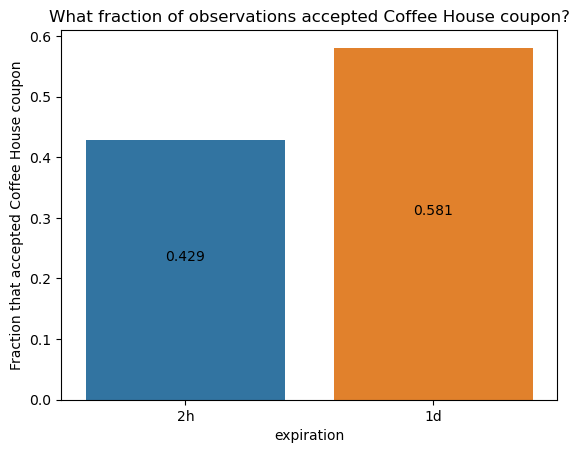

In [112]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'expiration'
barplot = sns.barplot(data=data_coffee.groupby('expiration')[['Y']].mean().reset_index().sort_values(by='Y'), x='expiration', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [113]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'expiration'
data_coffee.groupby('expiration')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index().sort_values(by=('Y' , 'mean'))

expiration    Y                
              sum count      mean
1         2h  911  2123  0.429110
0         1d  983  1693  0.580626

## Does gender of a driver affects accpetance of Coffee House coupon?

#### Observations:
#### Gender is neutral or a has weak effect on acceptance of the Coffee House coupon (Female : 49.1%, N=1969; Male : 50.2%, N=1847)

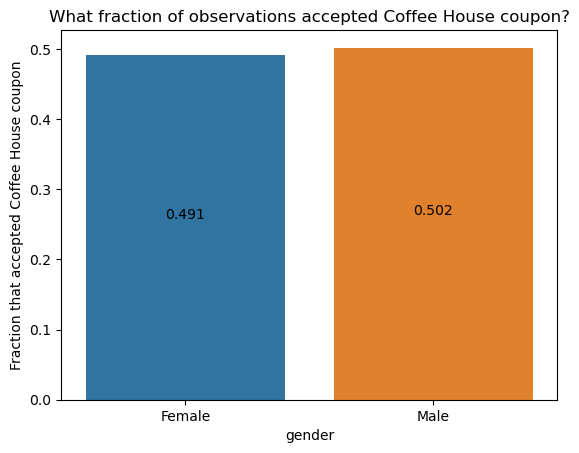

In [116]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'gender'
barplot=sns.barplot(data=data_coffee.groupby('gender')[['Y']].mean().reset_index(), x='gender', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [117]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'gender'
data_coffee.groupby('gender')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

gender    Y                
           sum count      mean
0  Female  967  1969  0.491112
1    Male  927  1847  0.501895

## Does age of the driver affects likelyhood of accepting Coffee House coupon?

#### Observations:
#### Drivers below age of 21 are more likely (67.8%, N=143) to accept Coffee house coupon, while drivers above 50 are less lieky (42.0%, N=529) to accept the coupon.

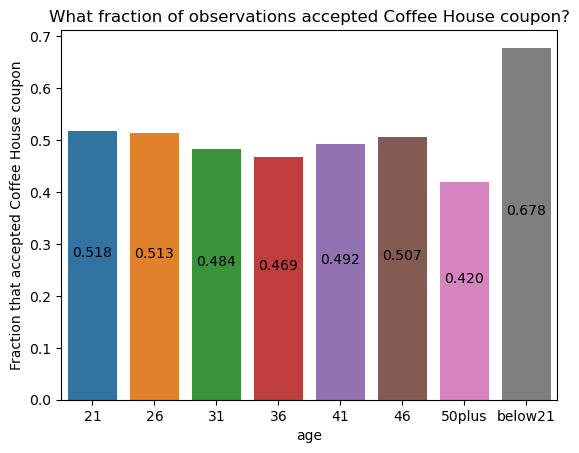

In [120]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'age'
barplot=sns.barplot(data=data_coffee.groupby('age')[['Y']].mean().reset_index(), x='age', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [121]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'age'
data_coffee.groupby('age')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

age    Y                
            sum count      mean
0       21  437   844  0.517773
1       26  409   797  0.513174
2       31  284   587  0.483816
3       36  179   382  0.468586
4       41  156   317  0.492114
5       46  110   217  0.506912
6   50plus  222   529  0.419660
7  below21   97   143  0.678322

## How does martial status of the driver affects acceptance of the Coffee House coupon?

#### Obervations:
#### Effects of martial status on acceptance of Coffee House coupon are hard to call due to small magnitude of changes between categories (Widowed : 35.3%, N=34; unmarried partner : 47%, N=676; married partner : 49.1, N=1466; Single : 51.4%, N=1497, Divorced : 51.7%, N=143). Category widowed does not have sufficient number of observations (N=34) to be confident about the effect size.

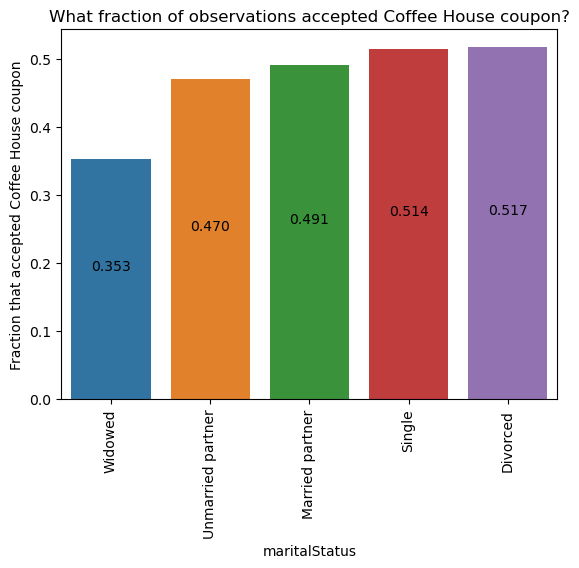

In [124]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'maritalStatus'
barplot=sns.barplot(data=data_coffee.groupby('maritalStatus')[['Y']].mean().reset_index().sort_values(by='Y'), x='maritalStatus', y='Y')
plt.xticks(rotation=90)
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [125]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'maritalStatus'
data_coffee.groupby('maritalStatus')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index().sort_values(by=('Y' , 'mean'))

maritalStatus    Y                
                      sum count      mean
4            Widowed   12    34  0.352941
3  Unmarried partner  318   676  0.470414
1    Married partner  720  1466  0.491132
2             Single  770  1497  0.514362
0           Divorced   74   143  0.517483

## How do childern affect likelyhood of acceptting Coffee House coupon?

#### Observations:
#### Having children is likely to neutral or have small effect on acceptance of Coffee House coupon (No children : 50.2% N=2360; Children : 48.8%, N=1456).

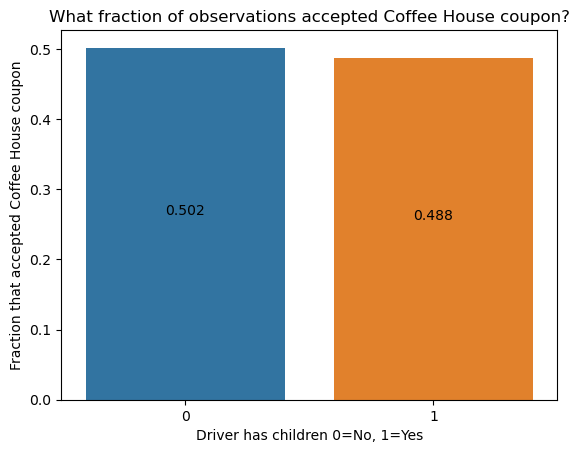

In [128]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'has_children'
barplot=sns.barplot(data=data_coffee.groupby('has_children')[['Y']].mean().reset_index(), x='has_children', y='Y')
plt.xlabel('Driver has children 0=No, 1=Yes')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [129]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'has_children'
data_coffee.groupby('has_children')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

has_children     Y                
                 sum count      mean
0            0  1184  2360  0.501695
1            1   710  1456  0.487637

## How does driver's education level affect acceptance of a Coffee House coupon?

#### Observations:
#### Bachelor degree (45.6%, N=1276) is perhaps negatively correlated with acceptance of Coffee House coupon while House School graduate (54.0%, N=272) is perhaps slightly positively correlated. 'Some High School' category (60.7%, N=28) have too few observations to be confident.

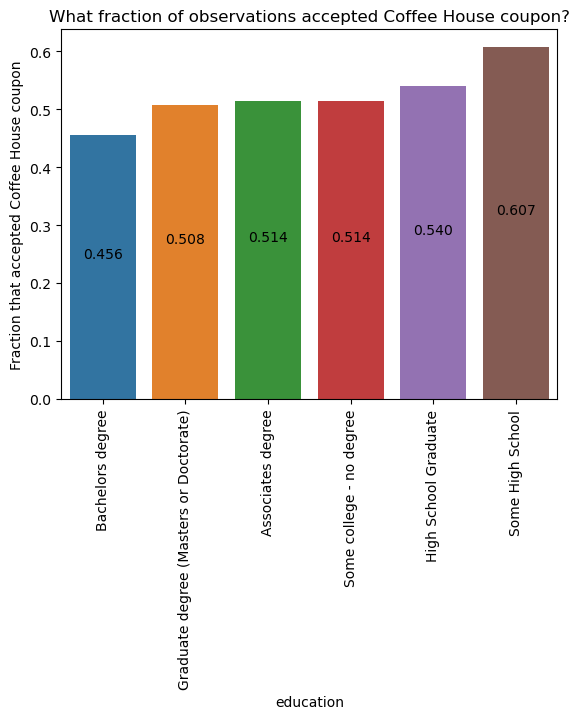

In [132]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'education'
barplot=sns.barplot(data=data_coffee.groupby('education')[['Y']].mean().reset_index().sort_values(by='Y'), x='education', y='Y')
plt.xticks(rotation=90)
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [133]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'education'
data_coffee.groupby('education')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index().sort_values(by=('Y' , 'mean'))

education    Y                
                                           sum count      mean
1                        Bachelors degree  582  1276  0.456113
2  Graduate degree (Masters or Doctorate)  298   587  0.507666
0                       Associates degree  167   325  0.513846
5                Some college - no degree  683  1328  0.514307
3                    High School Graduate  147   272  0.540441
4                        Some High School   17    28  0.607143

## Effect of driver's occupation on acceptance of Coffee House coupon.

#### Observations:
#### Most categories of occupation have insufficient data for confident calling correlation with acceptance of Coffee House coupon. However some occupations have more observations - Sales & Related (40%, N=348), Retired (40%, N=161), Education&Training&Library (41%, N=273), Office & Administrative Support(43.8%, N=192), Management (45.4%, N=271), Student(61.5%, N=475)

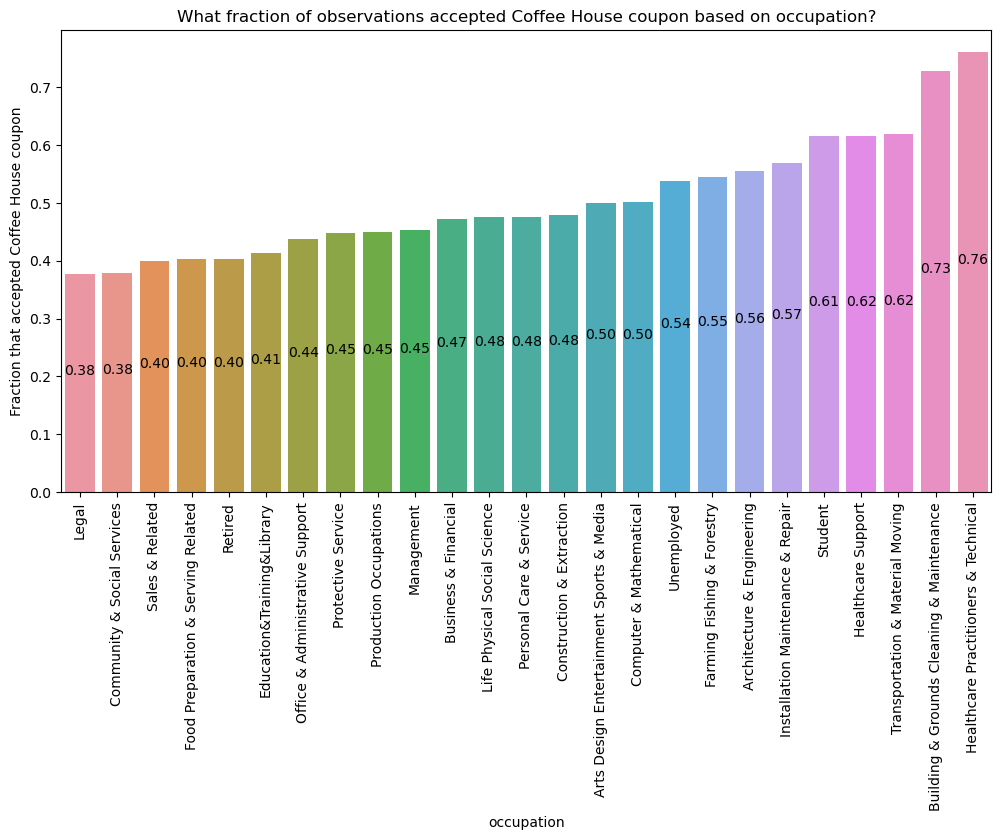

In [136]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'occupation'
plt.figure(figsize=(12, 6))
barplot=sns.barplot(data=data_coffee.groupby('occupation')[['Y']].mean().reset_index().sort_values(by='Y'), x='occupation', y='Y')

plt.xticks(rotation=90)
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon based on occupation?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [137]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'occupation'
data_coffee.groupby('occupation')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index().sort_values(by=('Y' , 'mean'))

occupation    Y                
                                               sum count      mean
13                                      Legal   26    69  0.376812
4                 Community & Social Services   25    66  0.378788
21                            Sales & Related  139   348  0.399425
9          Food Preparation & Serving Related   31    77  0.402597
20                                    Retired   65   161  0.403727
7                  Education&Training&Library  113   273  0.413919
16            Office & Administrative Support   84   192  0.437500
19                         Protective Service   26    58  0.448276
18                     Production Occupations    9    20  0.450000
15                                 Management  123   271  0.453875
3                        Business & Financial   67   142  0.471831
14               Life Physical Social Science   29    61  0.475410
17                    Personal Care & Service   20    42  0.476190
6                   Construction & Extraction   22    46  0.478261
1    Arts Design Entertainment Sports & Media   95   190  0.500000
5                     Computer & Mathematical  217   433  0.501155
24                                 Unemployed  296   551  0.537205
8                  Farming Fishing & Forestry    6    11  0.545455
0                  Architecture & Engineering   35    63  0.555556
12          Installation Maintenance & Repair   25    44  0.568182
22                                    Student  292   475  0.614737
11                         Healthcare Support   40    65  0.615385
23           Transportation & Material Moving   47    76  0.618421
2   Building & Grounds Cleaning & Maintenance    8    11  0.727273
10       Healthcare Practitioners & Technical   54    71  0.760563

## Efffect of driver's income on acceptance of Coffee House coupon

#### Observations:
#### There is no clear trend in income and acceptance of Coffee House coupon

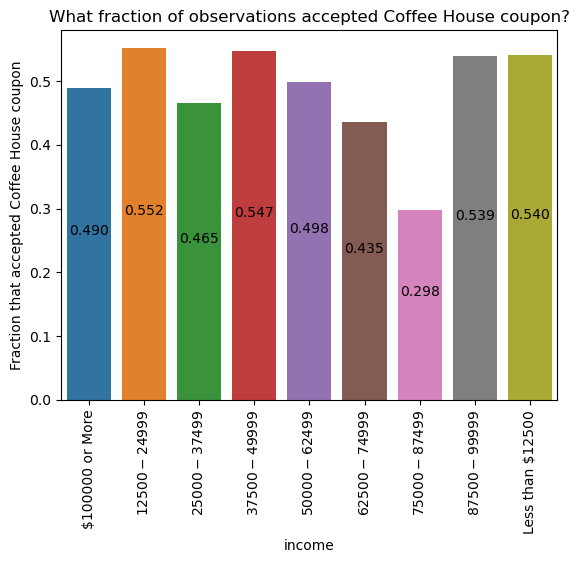

In [140]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'income'
barplot=sns.barplot(data=data_coffee.groupby('income')[['Y']].mean().reset_index(), x='income', y='Y')
plt.xticks(rotation=90)
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [141]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'income'
data_coffee.groupby('income')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

income    Y                
                     sum count      mean
0   $100000 or More  257   525  0.489524
1   $12500 - $24999  312   565  0.552212
2   $25000 - $37499  287   617  0.465154
3   $37500 - $49999  306   559  0.547406
4   $50000 - $62499  255   512  0.498047
5   $62500 - $74999  118   271  0.435424
6   $75000 - $87499   68   228  0.298246
7   $87500 - $99999  130   241  0.539419
8  Less than $12500  161   298  0.540268

## Does frequency of going to a bar affects acceptance of Coffee House coupon?

#### Observations:
    #### There is no clear trend in frequency of going to bar and acceptance of Coffee House coupon.

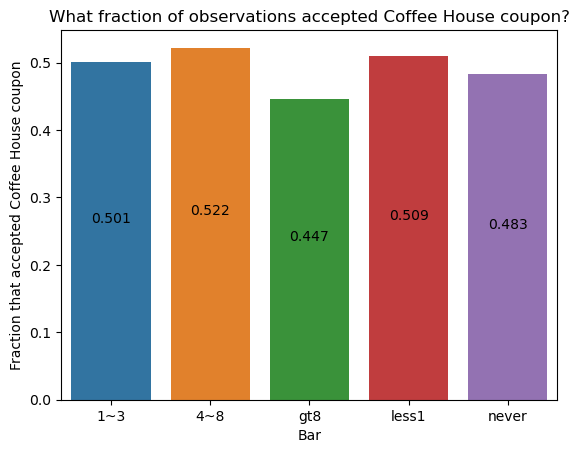

In [144]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'Bar'
barplot=sns.barplot(data=data_coffee.groupby('Bar')[['Y']].mean().reset_index(), x='Bar', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [145]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'Bar'
data_coffee.groupby('Bar')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

Bar    Y                
          sum count      mean
0    1~3  369   737  0.500678
1    4~8  190   364  0.521978
2    gt8   46   103  0.446602
3  less1  538  1056  0.509470
4  never  751  1556  0.482648

## Does frequency of going to a Coffee House affects acceptance of Coffee House coupon?

#### Observations:
#### Frequency of going to Coffee House is strongly correlated with acceptance of Coffee house coupons (Never : 17.5%, less than 1 : 48.1%, 1-3 : 64.8%, 4-8 : 68.2%, more than 8 times in a month : 65.8%)

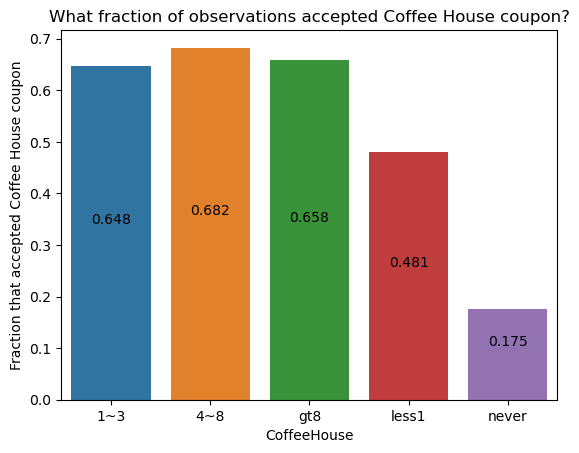

In [148]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'CoffeeHouse'
barplot=sns.barplot(data=data_coffee.groupby('CoffeeHouse')[['Y']].mean().reset_index(), x='CoffeeHouse', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [149]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'CoffeeHouse'
data_coffee.groupby('CoffeeHouse')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

CoffeeHouse    Y                
               sum count      mean
0         1~3  660  1019  0.647694
1         4~8  346   507  0.682446
2         gt8  225   342  0.657895
3       less1  506  1052  0.480989
4       never  157   896  0.175223

## Does frequency of buying takeaway food affects acceptance of Coffee House coupon?

#### Observations:
#### Perhaps buying takeaway food less than 1 time a month is negatively correlated with accepting Coffee House coupon (43.4%, N=552). Category 'never' have weak statistical power (48.5%, N=33)

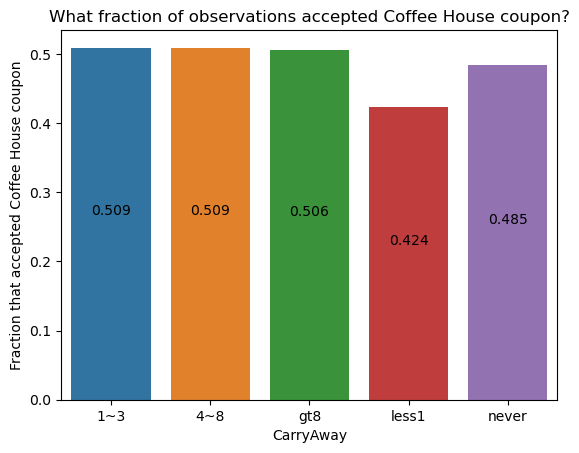

In [152]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'CarryAway'
barplot=sns.barplot(data=data_coffee.groupby('CarryAway')[['Y']].mean().reset_index(), x='CarryAway', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [153]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'CarryAway'
data_coffee.groupby('CarryAway')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

CarryAway    Y                
             sum count      mean
0       1~3  740  1453  0.509291
1       4~8  660  1296  0.509259
2       gt8  244   482  0.506224
3     less1  234   552  0.423913
4     never   16    33  0.484848

## Does frequency of going to cheaper restaurants affects acceptance of Coffee House coupon?

#### Observations:
#### Frequency of going to cheaper restaurants is correlated with acceptance of Coffee house coupons, with less frequent vistits negatively corrrelating with acceptance of the coupon (Never : 40.0%, less than 1 : 45.0%, 1-3 : 49.8%, 4-8 : 51.4%, more than 8 times in a month : 52.4%)

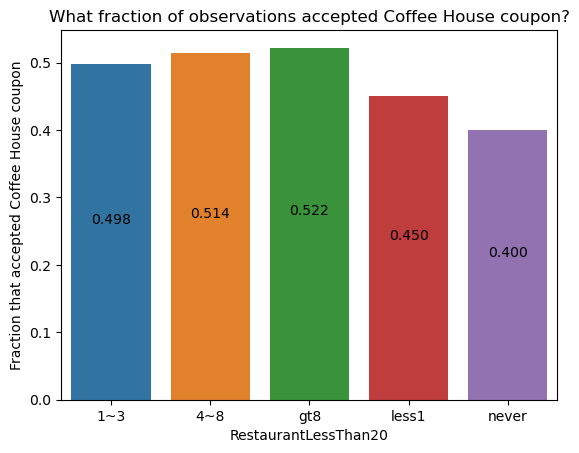

In [156]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'RestaurantLessThan20'
barplot=sns.barplot(data=data_coffee.groupby('RestaurantLessThan20')[['Y']].mean().reset_index(), x='RestaurantLessThan20', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [157]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'RestaurantLessThan20'
data_coffee.groupby('RestaurantLessThan20')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

RestaurantLessThan20    Y                
                        sum count      mean
0                  1~3  813  1633  0.497857
1                  4~8  561  1092  0.513736
2                  gt8  225   431  0.522042
3                less1  277   615  0.450407
4                never   18    45  0.400000

## Does frequency of going to more expensive restaurants affects acceptance of Coffee House coupon?

#### Observations:
#### Frequency of going to more expensive restaurants is correlated with acceptance of Coffee house coupons, with less frequent vistits negatively corrrelating with acceptance of the coupon, and more frequent visit positively correlated (Never : 42.6, less than 1 : 49.8%, 1-3 : 51.6%, 4-8 : 56.8%, more than 8 times in a month : 63.7%)
#### Frequency of attendance for more expensive restaurants is a better predictor of acceptance of the Coffee House coupon than frequency of attendance in cheap restaurants.

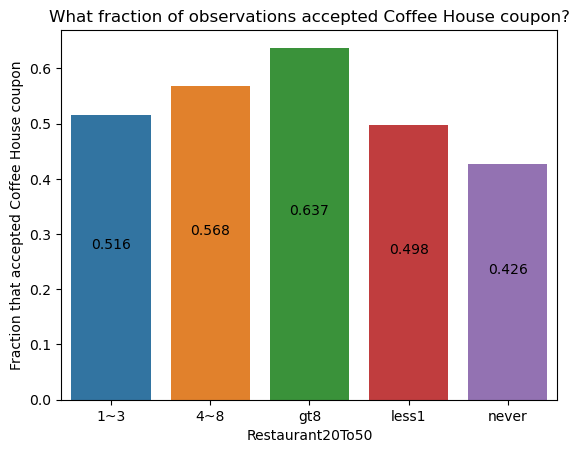

In [160]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'Restaurant20To50'
barplot=sns.barplot(data=data_coffee.groupby('Restaurant20To50')[['Y']].mean().reset_index(), x='Restaurant20To50', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [161]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'Restaurant20To50'
data_coffee.groupby('Restaurant20To50')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

Restaurant20To50    Y                
                    sum count      mean
0              1~3  538  1042  0.516315
1              4~8  104   183  0.568306
2              gt8   58    91  0.637363
3            less1  895  1798  0.497775
4            never  299   702  0.425926

## Does time of driving between destination and Coffee House affects acceptance of the Coffee House coupon?

#### Observations:
#### Longer driving time to destination is negatively correlated with acceptance of the Coffee House coupon (GEQ15min : 45.1%, GEQ25min : 34.2%)
#### Category GEQ5min is not useful due to insufficient data

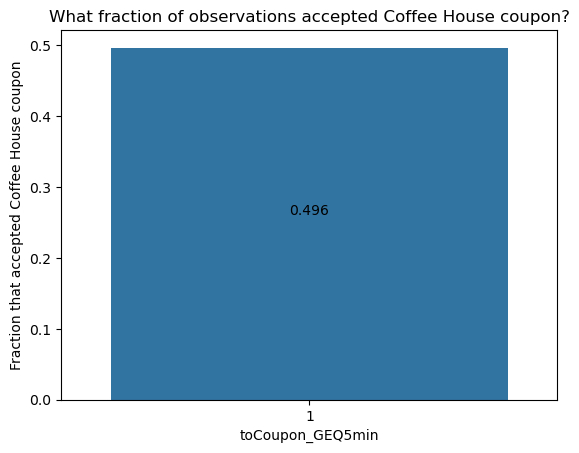

In [164]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'toCoupon_GEQ5min'
barplot=sns.barplot(data=data_coffee.groupby('toCoupon_GEQ5min')[['Y']].mean().reset_index(), x='toCoupon_GEQ5min', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [165]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'toCoupon_GEQ5min'
data_coffee.groupby('toCoupon_GEQ5min')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

toCoupon_GEQ5min     Y                
                     sum count      mean
0                1  1894  3816  0.496331

## Time of driving between destination and Coffee House greater or equal 15 min

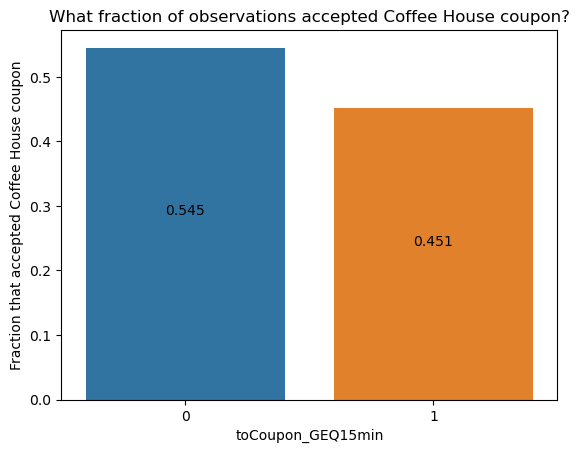

In [167]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'toCoupon_GEQ15min'
barplot=sns.barplot(data=data_coffee.groupby('toCoupon_GEQ15min')[['Y']].mean().reset_index(), x='toCoupon_GEQ15min', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [168]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'toCoupon_GEQ15min'
data_coffee.groupby('toCoupon_GEQ15min')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

toCoupon_GEQ15min     Y                
                      sum count      mean
0                 0  1000  1834  0.545256
1                 1   894  1982  0.451060

## Time of driving between destination and Coffee House greater or equal 25 min

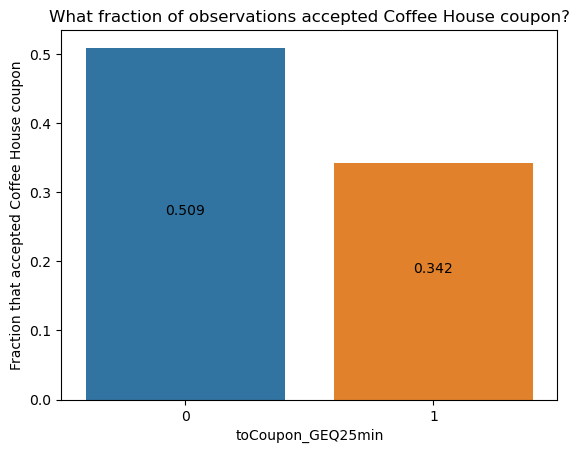

In [170]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'toCoupon_GEQ25min'
barplot=sns.barplot(data=data_coffee.groupby('toCoupon_GEQ25min')[['Y']].mean().reset_index(), x='toCoupon_GEQ25min', y='Y')
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [171]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'toCoupon_GEQ25min'
data_coffee.groupby('toCoupon_GEQ25min')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

toCoupon_GEQ25min     Y                
                      sum count      mean
0                 0  1792  3518  0.509380
1                 1   102   298  0.342282

## Does relative direction of Coffee House to travel destination affects acceptance of the Coffee House coupon?

# Observations:
#### There is weak correlation with same direction of travel being slightly preffered (52.7%, N=716) for acceptance of the Coffe coupon, vs the opposite direction (49.6%, N=3100).

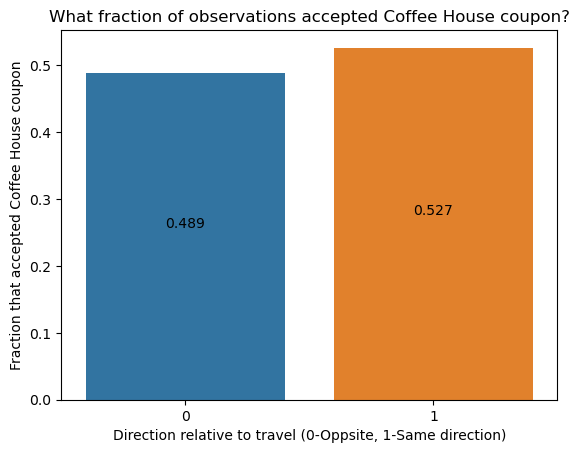

In [174]:
# Plot a fraction of drivers that accepted Coffee House coupon based on category 'direction_same'
barplot=sns.barplot(data=data_coffee.groupby('direction_same')[['Y']].mean().reset_index(), x='direction_same', y='Y')
plt.xlabel("Direction relative to travel (0-Oppsite, 1-Same direction)")
plt.ylabel("Fraction that accepted Coffee House coupon")
plt.title("What fraction of observations accepted Coffee House coupon?")
#Annotate each bar with fraction of accepted Coffee House coupons
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

In [175]:
#Calculate sum of accepted, count of all issued Coffee House coupons and mean for category 'direction_same'
data_coffee.groupby('direction_same')[['Y']].agg({'Y': ['sum', 'count', 'mean']}).reset_index()

direction_same     Y                
                   sum count      mean
0              0  1517  3100  0.489355
1              1   377   716  0.526536

# FINDINGS FOR COFFEE HOUSE COUPONS:
1. 49.63% of drivers accepted Coffee House coupon.
2. Frequency of going to Coffee House is strongly correlated with acceptance of Coffee house coupons (Never : 17.5%, less than 1 : 48.1%, 1-3 : 64.8%, 4-8 : 68.2%, more than 8 times in a month : 65.8%).
3. Frequency of going to more expensive restaurants is correlated with acceptance of Coffee house coupons, with less frequent vistits negatively corrrelating with acceptance of the coupon, and more frequent visit positively correlated (Never : 42.6, less than 1 : 49.8%, 1-3 : 51.6%, 4-8 : 56.8%, more than 8 times in a month : 63.7%).
4. Late morning (10AM : 63.5%) and early afternoon (2PM : 54.5%) positively correlated with acceptance of the Coffee House coupon, while late afternoon (6PM : 41.2%), night (42.9%) and early morning (44.0%) are negatively correlated with acceptance of the coupon.
5. Drivers below age of 21 are more likely (67.8%, N=143) to accept Coffee house coupon, while drivers above 50 are less lieky (42.0%, N=529) to accept the coupon.
6. Drivers are more likely to accept Coffee House coupon when they are not going Home (36.3%) or Work (44%) vs No urgent place (57.8%).
7. Longer driving time to destination is negatively correlated with acceptance of the Coffee House coupon (GEQ15min : 45.1%, GEQ25min : 34.2%)
8. Most categories of occupation have insufficient data for confident calling correlation with acceptance of Coffee House coupon. However some occupations have more observations - Sales & Related (40%, N=348), Retired (40%, N=161), Education&Training&Library (41%, N=273), Office & Administrative Support(43.8%, N=192), Management (45.4%, N=271), Student(61.5%, N=475).
9. Driving with a Friend(s) (59.7%) or a Partner (56.7%) increased Coffee House coupon acceptance vs driving with Kid(s) (47.2%) or alone (43.4%) which decreased likelyhood of accepting the coupon.
10. Drivers prefer longer expiration (1 day : 58.1%) over short expiration (2hr : 42.9%) for accepting Coffee House coupon.
11. Frequency of going to cheaper restaurants is correlated with acceptance of Coffee house coupons, with less frequent vistits negativelycorrrelating with acceptance of the coupon (Never : 40.0%, less than 1 : 45.0%, 1-3 : 49.8%, 4-8 : 51.4%, more than 8 times in a month : 52.4%).
12. Perhaps buying takeaway food less than 1 time a month is negatively correlated with accepting Coffee House coupon (43.4%, N=552). Category 'never' have weak statistical power (48.5%, N=33).
13. Snowy weather (42.8%, N=285) discouraged drivers from accepting Coffee House coupon, while Sunny (50.1%, N=3316) or Rainy (51.6%, N=215) is likely neutral for accepting the coupon.
14. achelor degree (45.6%, N=1276) is perhaps negatively correlated with acceptance of Coffee House coupon while House School graduate (54.0%, N=272) is perhaps slightly positively correlated. 'Some High School' category (60.7%, N=28) have too few observations to be confident
15. Warmer air temperature (80F : 52.7%, N=2298) weakly correlates with acceptance of Coffee House coupon while cooler temperatures (30F : 44.1% N=299; 50F : 45.2%, N=1219) are negatively correlated with acceptance of the coupon. 
16. Effects of martial status on acceptance of Coffee House coupon are hard to call due to small magnitude of changes between categories (Widowed : 35.3%, N=34; unmarried partner : 47%, N=676; married partner : 49.1, N=1466; Single : 51.4%, N=1497, Divorced : 51.7%, N=143). Category widowed does not have sufficient number of observations (N=34) to be confident about the effect size.
17. There is weak correlation with same direction of travel being slightly preffered (52.7%, N=716) for acceptance of the Coffe coupon, vs the opposite direction (49.6%, N=3100).
18. Having children is likely to neutral or have small effect on acceptance of Coffee House coupon (No children : 50.2% N=2360; Children : 48.8%, N=1456).
19. Gender is neutral or a has weak effect on acceptance of the Coffee House coupon (Female : 49.1%, N=1969; Male : 50.2%, N=1847)
20. There is no clear trend in frequency of going to bar and acceptance of Coffee House coupon.
21. There is no clear trend in income and acceptance of Coffee House coupon.

# NEXT STEPS AND RECOMMENDATIONS:
1. Perform bivariate analysis based on the results of univariate analysis of factors influencing driver's acceptance of Coffee House coupons.
2. Perform analysis of other coupons to uncover other relationships: Restaurant(<20) coupons, Restaurant(20-50) coupons, Carry out & Take away coupons.
